### IMPORT NECESSARY LIBRARIES

In [1]:
import tensorflow as tf
from  tensorflow import keras
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'



physical_devices = tf.config.experimental.list_physical_devices('GPU') 
if len(physical_devices) > 0: 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_test.shape


(10000, 1)

# Create the model


In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(34, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model



In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model


In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 11ms/step - loss: 1.5480 - accuracy: 0.4402
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1697 - accuracy: 0.5855
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0309 - accuracy: 0.6398
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9430 - accuracy: 0.6718
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8781 - accuracy: 0.6946


In [24]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def showImage(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

# Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.9310 - accuracy: 0.6756
Test accuracy: 0.675599992275238


In [35]:
def showImage(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

### MAKE PREDICTIONS

In [42]:
y_test = y_test.reshape(-1,)

In [43]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y = y_test.reshape(-1, )

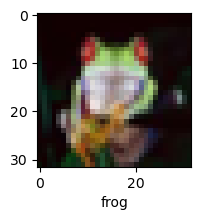

In [52]:
showImage(x_test, y_test, 102)